# Regression Case Study

data set yang digunakan [fish market](https://www.kaggle.com/datasets/aungpyaeap/fish-market).

Tugas yang akan kita kerjakan adalah membuat model yang dapat memprediksi berat ikan berdasarkan data panjang, lebar, dan tinggi ikan tersebut.

Keterangan kolom data:
1. Species: Species name of fish
2. Weight: Weight of fish (gram)
3. Length1: Vertical length (cm)
4. Length2: Diagonal length (cm)
5. Length3: Cross length (cm)
6. Height: Height (cm)
7. Width: Diagonal width (cm)


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (20,10)
plt.rcParams['font.size'] = 16

## Exploratory Data Analysis

### Load Data

In [33]:
fish_df = pd.read_csv('Dataset/Fish.csv')
fish_df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [34]:
fish_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


### Descriptive Statistics

In [35]:
fish_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,159.0,398.326415,357.978317,0.0000,120.00000,273.0000,650.0000,1650.000
Length1,159.0,26.247170,9.996441,7.5000,19.05000,25.2000,32.7000,59.000
Length2,159.0,28.415723,10.716328,8.4000,21.00000,27.3000,35.5000,63.400
Length3,159.0,31.227044,11.610246,8.8000,23.15000,29.4000,39.6500,68.000
Height,159.0,8.970994,4.286208,1.7284,5.94480,7.7860,12.3659,18.957
Width,159.0,4.417486,1.685804,1.0476,3.38565,4.2485,5.5845,8.142


### Korelasi

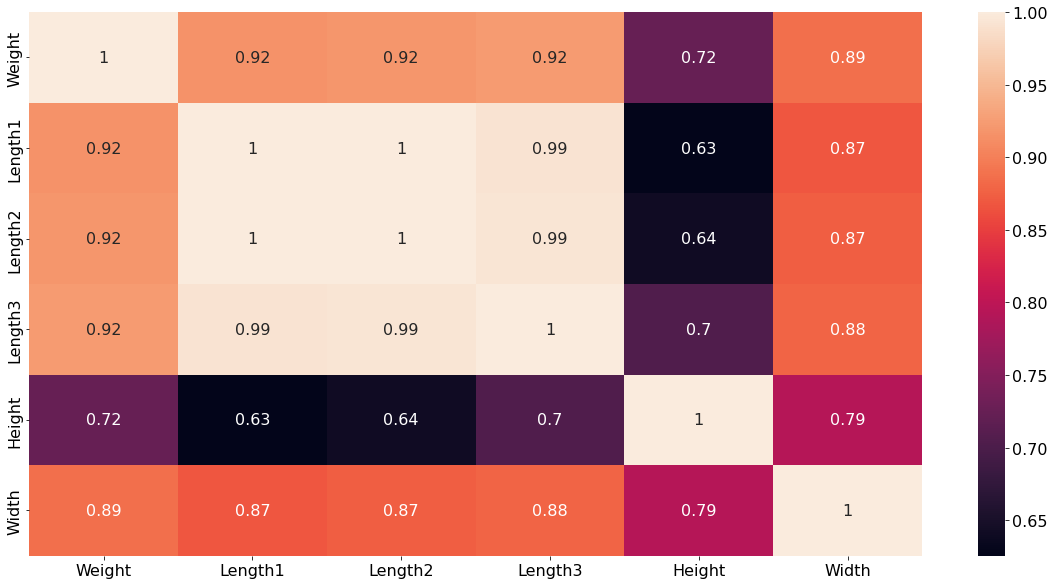

In [36]:
sns.heatmap(fish_df.corr(), annot=True)
plt.show()

### Hubungan Antar Data

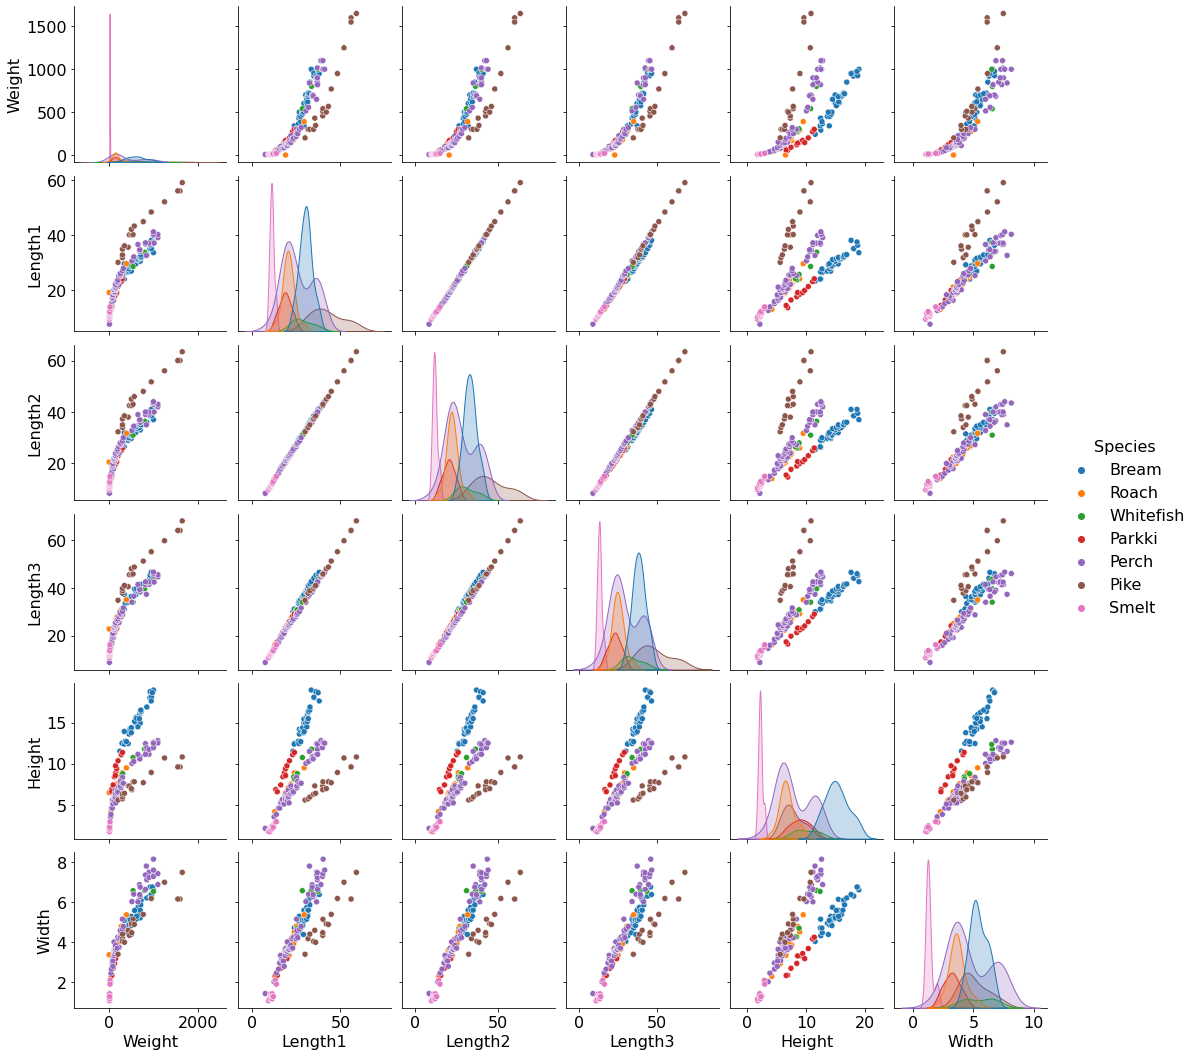

In [37]:
sns.pairplot(fish_df, kind='scatter', hue='Species')
plt.show()

Korelasi antara Length1, Length2, dan Length3 hampir 1. Ini akan menyebabkan 'Multikolinearitas' dan jika kita tetap digunakan, dapat menyebabkan prediksi yang tidak dapat diandalkan.

In [38]:
fish_df2 = fish_df.copy()
fish_df2 = fish_df2.drop(['Length2', 'Length3'], axis =1)
fish_df2.head()

,Species,Weight,Length1,Height,Width
0,Bream,242.0,23.2,11.5200,4.0200
1,Bream,290.0,24.0,12.4800,4.3056
2,Bream,340.0,23.9,12.3778,4.6961
3,Bream,363.0,26.3,12.7300,4.4555
4,Bream,430.0,26.5,12.4440,5.1340


In [39]:
fish_df2[fish_df2.Weight <= 0]

,Species,Weight,Length1,Height,Width
40,Roach,0.0,19.0,6.4752,3.3516


In [40]:
fish_df2 = fish_df2.drop([40])

### Outliers

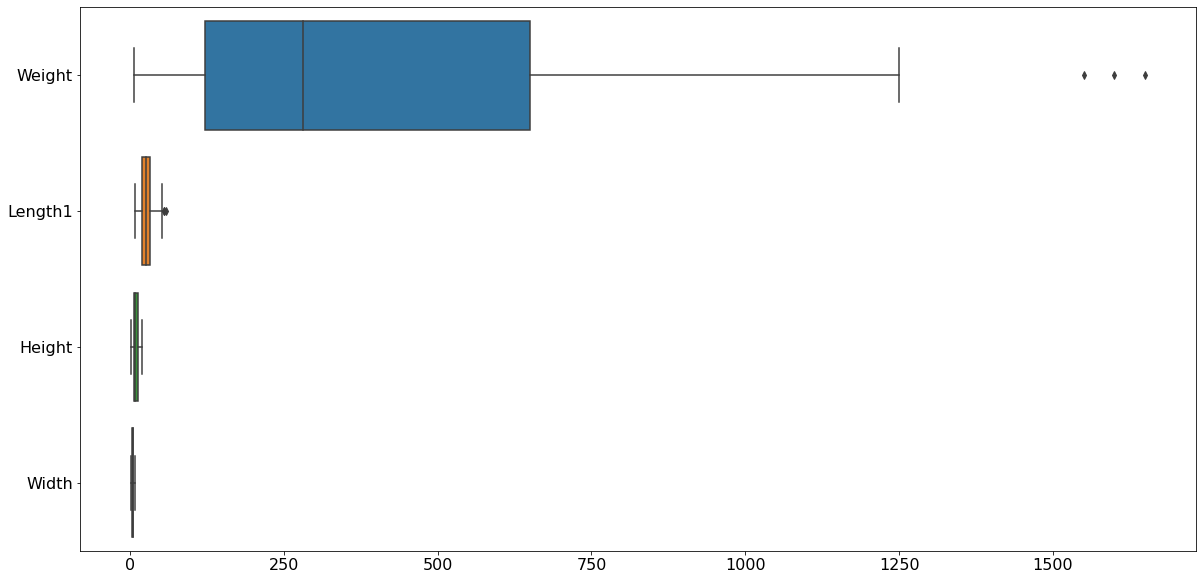

In [41]:
sns.boxplot(data=fish_df2, orient='h')
plt.show()

outlier_atas > Q3 + 1.5 * IQR   
outlier_bawah < Q1 -1.5 * IQR

  Q1  = First quartile   
  Q3  = Third quartile   
  IQR = Interquartile range (Q3 - Q1)

In [42]:
def deteksi_outlier(fish_df2):
  """
  melakukan deteksi outlier
  """
  Q1 = fish_df2.quantile(0.25)
  Q3 = fish_df2.quantile(0.75)
  IQR = Q3 - Q1
  outlier_atas = Q3 + 1.5 * IQR
  outlier_bawah = Q1 - 1.5 * IQR 
  outlier = fish_df2[(fish_df2 > outlier_atas) | (fish_df2 < outlier_bawah)]
  return outlier

In [43]:
deteksi_outlier(fish_df2['Weight'])

142    1600.0
143    1550.0
144    1650.0
Name: Weight, dtype: float64

In [44]:
fish_df2 = fish_df2.drop([142,143,144])

## Data Preparation

Karena datanya tidak terlalu rumit, demi kesederhanaan, untuk features tidak menggunakan column species.

In [45]:
target = fish_df['Weight']
features = fish_df.copy()
features.drop(columns=['Species', 'Weight'], inplace=True)

In [46]:
target2 = fish_df2['Weight']
features2 = fish_df2.copy()
features2.drop(columns=['Species', 'Weight'], inplace=True)

<div class="alert alert-block alert-warning">
Bagaimana bila kita menggunakan kolom berbeda sebagai features? Bagaimana memilih kolom yang akan digunakan sebagai features?
</div>

In [47]:
features

,Length1,Length2,Length3,Height,Width
0,23.2,25.4,30.0,11.5200,4.0200
1,24.0,26.3,31.2,12.4800,4.3056
2,23.9,26.5,31.1,12.3778,4.6961
3,26.3,29.0,33.5,12.7300,4.4555
4,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...
154,11.5,12.2,13.4,2.0904,1.3936
155,11.7,12.4,13.5,2.4300,1.2690
156,12.1,13.0,13.8,2.2770,1.2558
157,13.2,14.3,15.2,2.8728,2.0672


In [48]:
features2.head()

,Length1,Height,Width
0,23.2,11.5200,4.0200
1,24.0,12.4800,4.3056
2,23.9,12.3778,4.6961
3,26.3,12.7300,4.4555
4,26.5,12.4440,5.1340


In [49]:
target

0      242.0
1      290.0
2      340.0
3      363.0
4      430.0
       ...  
154     12.2
155     13.4
156     12.2
157     19.7
158     19.9
Name: Weight, Length: 159, dtype: float64

In [50]:
target2

0      242.0
1      290.0
2      340.0
3      363.0
4      430.0
       ...  
154     12.2
155     13.4
156     12.2
157     19.7
158     19.9
Name: Weight, Length: 155, dtype: float64

## Membuat Model

### Linear Regression

In [51]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

cv = KFold(n_splits=10, shuffle=True, random_state=100)

In [58]:
linreg = LinearRegression()
linreg.fit(features2, target2)
linreg_scores = cross_val_score(X=features2, y=target2, estimator=linreg, cv=cv, scoring='r2')
linreg_scores

array([0.9118243 , 0.91837067, 0.84093329, 0.93205791, 0.89764396,
       0.81228591, 0.92030532, 0.32663063, 0.80459599, 0.9219574 ])

### Model Pembanding

<div class="alert alert-block alert-warning">
Buatlah model pembanding, kemudian bandingkan performa model tersebut dengan model di atas.
</div>

#### Polynomial Regression

In [53]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

polyreg = make_pipeline(PolynomialFeatures(degree=3, include_bias=False),
                        LinearRegression())
polyreg.fit(features2, target2)
polyreg_scores = cross_val_score(X=features2, y=target2, estimator=polyreg, cv=cv, scoring='r2')
polyreg_scores

array([0.97366454, 0.98270591, 0.94874394, 0.99438997, 0.98128509,
       0.95810335, 0.9732563 , 0.9868631 , 0.96617119, 0.98216463])

#### Decision Tree Regressor

In [54]:
from sklearn import tree

dtreg = tree.DecisionTreeRegressor(criterion='squared_error',
                                   max_depth=None, #berapa ke bawah
                                   min_samples_split=2, #cabangnya min brp
                                   min_samples_leaf=1,
                                   max_leaf_nodes=None)
dtreg.fit(features2, target2)
dtreg_scores = cross_val_score(X=features2, y=target2, estimator=dtreg, cv=cv, scoring='r2')
dtreg_scores

array([0.92438387, 0.9682865 , 0.92485165, 0.95870053, 0.90618037,
       0.81667509, 0.93423003, 0.92996536, 0.907678  , 0.94066779])

### Random Forest Regressor

In [55]:
from sklearn.ensemble import RandomForestRegressor

rfreg = RandomForestRegressor(n_estimators=100, #banyaknya pohon
                              criterion='squared_error',
                              max_depth=None,
                              min_samples_split=2,
                              min_samples_leaf=1,
                              max_leaf_nodes=None,
                              bootstrap=True,
                              max_samples=0.5, #setiap pohon ditrain dgn data yg berbeda sebanyak 50% dari data = 800*50% = 400
                              random_state=100)
rfreg.fit(features2, target2)
rfreg_scores = cross_val_score(X=features2, y=target2, estimator=rfreg, cv=cv, scoring='r2')
rfreg_scores

array([0.97090123, 0.96101593, 0.93788624, 0.9846931 , 0.96648642,
       0.8553856 , 0.97218233, 0.98898654, 0.96180636, 0.9678363 ])

### Neural Network

In [56]:
from sklearn.neural_network import MLPRegressor

nnreg = MLPRegressor(hidden_layer_sizes=(10, 3), # hidden layer 1 tapi 100 ke bawah # (10,10) hidden layer nya 10, tiap layer ada 10 nodes
                     activation='relu', # klo f(x) 0 maka hasilnya nol, ga bisa di bawah
                     max_iter=5000, # menunggu sampe di 5000 iterasi klo belum selesai yah selsai di 5000
                     batch_size='auto',
                     random_state=100)
nnreg.fit(features2, target2)
nnreg_scores = cross_val_score(X=features2, y=target2, estimator=nnreg, cv=cv, scoring='r2')
nnreg_scores

c:\Users\KomputerSKKK\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\KomputerSKKK\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\KomputerSKKK\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\KomputerSKKK\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterat

array([0.9685218 , 0.97035973, 0.94016759, 0.98423452, 0.96300967,
       0.89693898, 0.98150253, 0.94665268, 0.91990563, 0.95934908])

## Performa Model

In [59]:
# polyreg_scores, dtreg_scores, rfreg_scores, nnreg_scores
print('Linear Regression')
print('score= ', linreg.score(features2,target2))

print('Polynomial Regression')
print('score= ', polyreg.score(features2,target2))

print('Decision Tree Regressor')
print('score= ', dtreg.score(features2,target2))

print('Random Forest Regressor')
print('score= ', rfreg.score(features2,target2))

print('Neural Network')
print('score= ', nnreg.score(features2,target2))

Linear Regression
score=  0.8962175433399019
Polynomial Regression
score=  0.9857367762485667
Decision Tree Regressor
score=  1.0
Random Forest Regressor
score=  0.9863084289211906
Neural Network
score=  0.9685833454439152


## Membandingkan Performa Model

Kita akan membandingkan performa 2 model dengan menggunakan hypothesis testing.

$H_0$: Tidak ada perbedaan performa antara kedua model<br>
$H_A$: Terdapat perbedaan performa antara kedual model

#### linreg_scores & polyreg_scores

In [60]:
from scipy import stats

# Jangan lupa ganti variabel kedua dengan scores dari model yang anda buat
_, p_value = stats.ttest_ind(linreg_scores, polyreg_scores) # polyreg_scores, dtreg_scores, rfreg_scores, nnreg_scores
p_value

0.021374008396884577

#### linreg_scores & dtreg_scores

In [61]:
from scipy import stats

# Jangan lupa ganti variabel kedua dengan scores dari model yang anda buat
_, p_value = stats.ttest_ind(linreg_scores, dtreg_scores) # polyreg_scores, dtreg_scores, rfreg_scores, nnreg_scores
p_value

0.13600392007370266

#### linreg_scores & rfreg_scores

In [62]:
from scipy import stats

# Jangan lupa ganti variabel kedua dengan scores dari model yang anda buat
_, p_value = stats.ttest_ind(linreg_scores, rfreg_scores) # polyreg_scores, dtreg_scores, rfreg_scores, nnreg_scores
p_value

0.04371703915887103

#### linreg_scores & nnreg_scores

In [63]:
from scipy import stats

# Jangan lupa ganti variabel kedua dengan scores dari model yang anda buat
_, p_value = stats.ttest_ind(linreg_scores, nnreg_scores) # polyreg_scores, dtreg_scores, rfreg_scores, nnreg_scores
p_value

0.04737064230489387

## Kesimpulan

Berdasarkan hasil pengujian decision tree tidak ada perbedaan performa   
> memiliki p_value yang tidak significant (> 0.05) dan 
$H_0$: Tidak ada perbedaan performa antara kedua model
diterima

Sedangkan untuk polyreg, rfreg dan neural_network terdapat perbedaan performa terdapat perbedaan performa   
> memiliki p_value yang significant (< 0.05) dan 
$H_0$: Tidak ada perbedaan performa antara kedua model **ditolak**, sehingga   
$H_A$: Terdapat perbedaan performa antara kedual model